# Characterizing LP characteristics of the basic neuron

Want to see if the cutoff is the same as the time constant

In [1]:
import sns_toolbox
import numpy as np
import matplotlib.pyplot as plt

In [2]:
numFreq = 5
dt = 0.1 # ms
tMax = 100
t = np.arange(start=0.0,stop=tMax,step=dt/1000)
frequencies = np.logspace(-1,2,num=numFreq)
inputs = np.zeros([numFreq,len(t)])

In [3]:
for i in range(numFreq):
    inputs[i,:] = np.sin(2*np.pi*frequencies[i]*t)
peaks_inputs = np.max(inputs,axis=1)

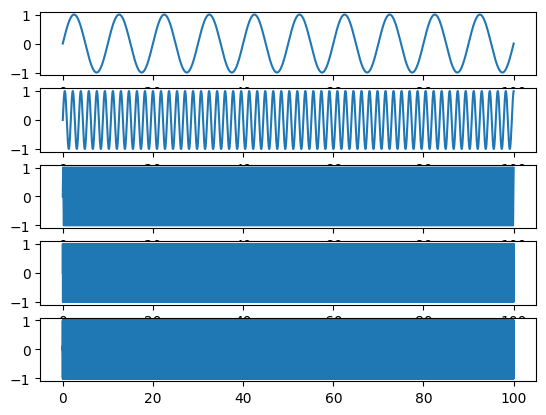

In [4]:
plt.figure()
for i in range(numFreq):
    plt.subplot(numFreq,1,i+1)
    plt.plot(t,inputs[i,:])

In [5]:
from sns_toolbox.neurons import NonSpikingNeuron
from sns_toolbox.networks import Network
from sns_toolbox.renderer import render

# Let's find a value of C that corresponds to a cutoff frequency of 5 Hz

In [75]:
def magnitude_5_hz(C):
    dt = 0.5 # ms
    
    net = Network()
    neuron_type = NonSpikingNeuron(membrane_conductance=1.0, membrane_capacitance=C)
    net.add_neuron(neuron_type)
    net.add_input(0)
    net.add_output(0,spiking=False)

    model = net.compile(backend='numpy',dt=dt)
    
    dt_s = dt/1000
    t_max = 1
    t = np.arange(start=0.0, stop=t_max, step=dt_s)
    
    inp = np.sin(2*np.pi*5*t)
    out = np.zeros_like(inp)
    for i in range(len(t)):
        out[i] = model([inp[i]])
    peak = np.max(out)
    
    mag = 20*np.log10(peak)
    
    return abs(-3 - mag)

In [76]:
magnitude_5_hz(5*2*np.pi)

0.6356900034878521

In [77]:
from scipy.optimize import minimize_scalar

c_opt = minimize_scalar(magnitude_5_hz, method='bounded', bounds=(1,3*np.pi*1000))#, options={'disp': True})
c_opt.x

38.26255995456264

In [44]:
c_opt.x

38.06333077084295

In [46]:
magnitude_5_hz(c_opt.x)

1.1613000516774719e-07

In [69]:
dt_ms = 0.1
freq_sample = 2*dt_ms/1000
print(freq_sample)

0.0002


In [72]:
freq_cutoff = 5
w_cutoff = (freq_cutoff*2*np.pi)#/(freq_sample)
print(w_cutoff)

31.41592653589793


In [73]:
alpha = np.cos(w_cutoff) - 1 + np.sqrt((np.cos(w_cutoff))**2 - 4*np.cos(w_cutoff) + 3)
print(alpha)

0.0


In [67]:
np.cos(w_cutoff)

/tmp/ipykernel_13254/3709694924.py:1: RuntimeWarning: invalid value encountered in cos
  np.cos(np.inf)


nan

In [78]:
dt = 0.01 # ms
net = Network()
neuron_type = NonSpikingNeuron(membrane_conductance=1.0, membrane_capacitance=c_opt.x)
net.add_neuron(neuron_type)
net.add_input(0)
net.add_output(0,spiking=False)

model = net.compile(backend='numpy',dt=dt)

dt_s = dt/1000
t_max = 1
t = np.arange(start=0.0, stop=t_max, step=dt_s)

In [79]:
inp = np.sin(2*np.pi*5*t)
out = np.zeros_like(inp)
for i in range(len(t)):
    out[i] = model([inp[i]])

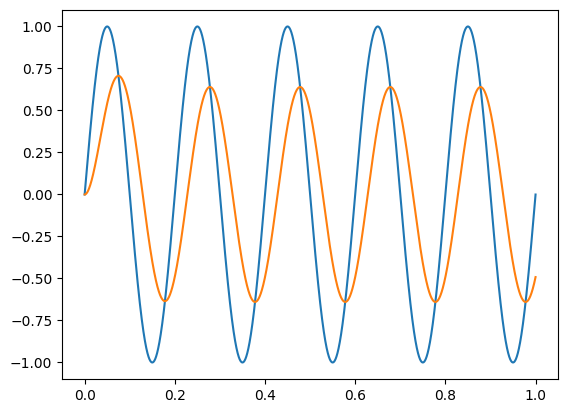

In [80]:
plt.figure()
plt.plot(t,inp)
plt.plot(t,out)

In [49]:
c_opt.x

38.06333077084295

In [50]:
c_opt.x/freq_sample

380.6333077084295